# SPRINT 6: GOODLIFE FITNESS

GROUP: 03</BR>
GROUP MEMBERS:</BR> 
SACHINE</BR>
TAVLEEN</BR>
THOMPSON</BR>

### GoodLife Fitness is a renowned fitness club chain in Canada, known for its wide range of fitness classes and top-notch gym facilities. With numerous locations across the country, GoodLife aims to provide a comprehensive fitness experience to its members, focusing on both individual workouts and group fitness classes.

# KEY FEATURES</BR>
1. date (string; datetime of data)
2. timestamp (int; number of seconds since beginning of day)
3. day_of_week (int; 0 [monday] - 6 [sunday])
4. is_weekend (int; 0 or 1) [boolean, if 1, it's either saturday or sunday, otherwise 0]
5. is_holiday (int; 0 or 1) [boolean, if 1 it's a federal holiday, 0 otherwise]
6. temperature (float; degrees fahrenheit)
7. is_start_of_semester (int; 0 or 1) [boolean, if 1 it's the beginning of a school semester, 0 otherwise]
8. month (int; 1 [jan] - 12 [dec])
9. hour (int; 0 - 23)

# REQUIRED LIBRARIES

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve

# LOADING THE DATASET

In [26]:
# Load the Datasets
problem1_df = pd.read_csv('problem1.csv')
problem2_df = pd.read_csv('problem2.csv')

# Display First Few Rows and Check for Missing Values
print("Problem 1 Data:")
print(problem1_df.head())
print(problem1_df.info())
print(problem1_df.isnull().sum())

Problem 1 Data:
   number_people                       date  timestamp  day_of_week   
0             37  2015-08-14 17:00:11-07:00      61211            4  \
1             45  2015-08-14 17:20:14-07:00      62414            4   
2             40  2015-08-14 17:30:15-07:00      63015            4   
3             44  2015-08-14 17:40:16-07:00      63616            4   
4             45  2015-08-14 17:50:17-07:00      64217            4   

   is_weekend  is_holiday  temperature  is_start_of_semester   
0           0           0        71.76                     0  \
1           0           0        71.76                     0   
2           0           0        71.76                     0   
3           0           0        71.76                     0   
4           0           0        71.76                     0   

   is_during_semester  month  hour  
0                   0      8    17  
1                   0      8    17  
2                   0      8    17  
3                   0   

In [27]:
print("\nProblem 2 Data:")
print(problem2_df.head())
print(problem2_df.info())
print(problem2_df.isnull().sum())


Problem 2 Data:
   booking_id  months_as_member  weight days_before day_of_week time   
0           1                17   79.56           8         Wed   PM  \
1           2                10   79.01           2         Mon   AM   
2           3                16   74.53          14         Sun   AM   
3           4                 5   86.12          10         Fri   AM   
4           5                15   69.29           8         Thu   AM   

   category  attended  
0  Strength         0  
1      HIIT         0  
2  Strength         0  
3   Cycling         0  
4      HIIT         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week  

# CHECKING MISSING VALUES

In [28]:
# Impute Missing Values

# Numerical columns - median imputation
num_imputer = SimpleImputer(strategy='median')
problem2_df['weight'] = num_imputer.fit_transform(problem2_df[['weight']])

# Convert days_before to numeric 
problem2_df['days_before'] = pd.to_numeric(problem2_df['days_before'], errors='coerce')

# Verify if there are any remaining missing values
print("Remaining missing values in Problem 2 Data:")
print(problem2_df.isnull().sum())

# Encode Categorical Variables
le = LabelEncoder()
for column in ['day_of_week', 'time', 'category']:
    problem2_df[column] = le.fit_transform(problem2_df[column])

Remaining missing values in Problem 2 Data:
booking_id           0
months_as_member     0
weight               0
days_before         25
day_of_week          0
time                 0
category             0
attended             0
dtype: int64


# CLEAN DATASET

In [29]:
# Save the Cleaned Dataset
problem2_df.to_csv('cleaned_problem2.csv', index=False)

# Display the cleaned data
(problem2_df.head())

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8.0,8,1,4,0
1,2,10,79.01,2.0,2,0,3,0
2,3,16,74.53,14.0,5,0,4,0
3,4,5,86.12,10.0,0,0,2,0
4,5,15,69.29,8.0,6,0,3,0


# EXPOLATORY DATA ANALYSIS

In [30]:
print("\nSummary Statistics for Problem A Data:")
(problem1_df.describe())


Summary Statistics for Problem A Data:


,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [31]:
print("\nSummary Statistics for Problem B Data:")
(problem2_df.describe())


Summary Statistics for Problem B Data:


,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
count,1500.000000,1500.000000,1500.000000,1475.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,15.628667,82.585707,8.347797,4.092667,0.239333,2.957333,0.302667
std,433.157015,12.926543,12.682188,4.080647,2.667988,0.426819,1.022518,0.459565
min,1.000000,1.000000,55.410000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,375.750000,8.000000,73.562500,4.000000,2.000000,0.000000,2.000000,0.000000
50%,750.500000,12.000000,80.760000,9.000000,5.000000,0.000000,3.000000,0.000000
75%,1125.250000,19.000000,89.382500,12.000000,6.000000,0.000000,3.000000,1.000000
max,1500.000000,148.000000,170.520000,29.000000,9.000000,1.000000,5.000000,1.000000


# CORRELATION MATRIX OF PROBLEM A

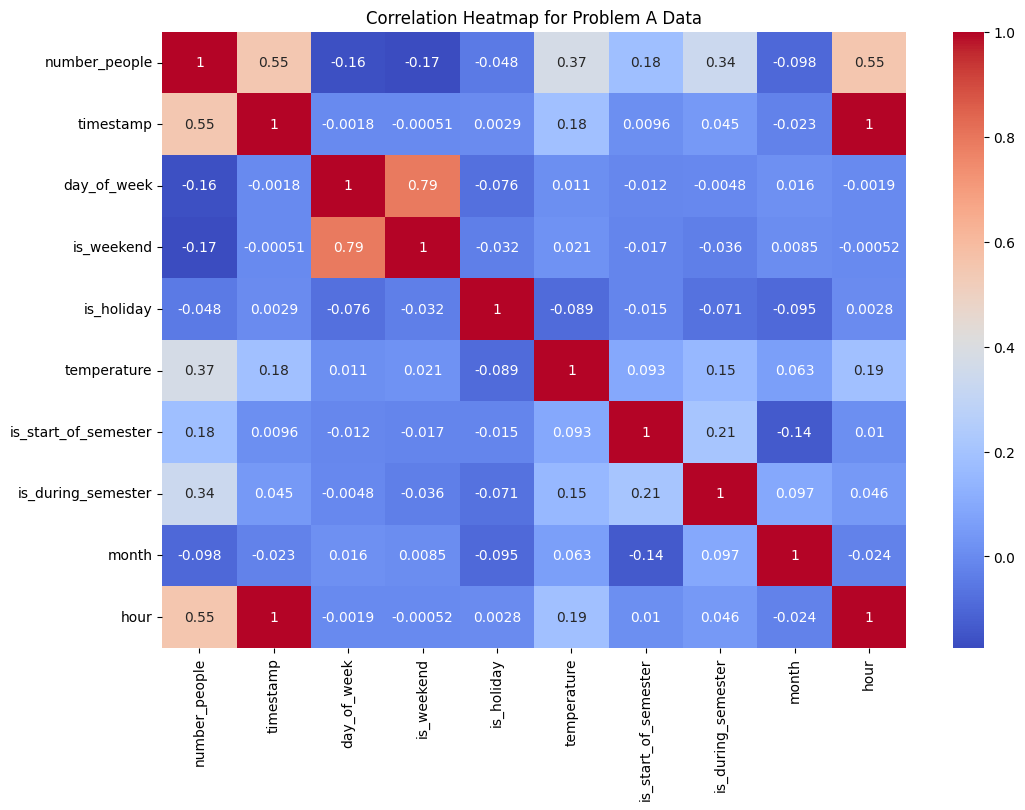

In [32]:
# Exclude non-numeric columns
numeric_columns = problem1_df.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Problem A Data')
plt.show()

# CORRELATION MATRIX OF PROBLEM B

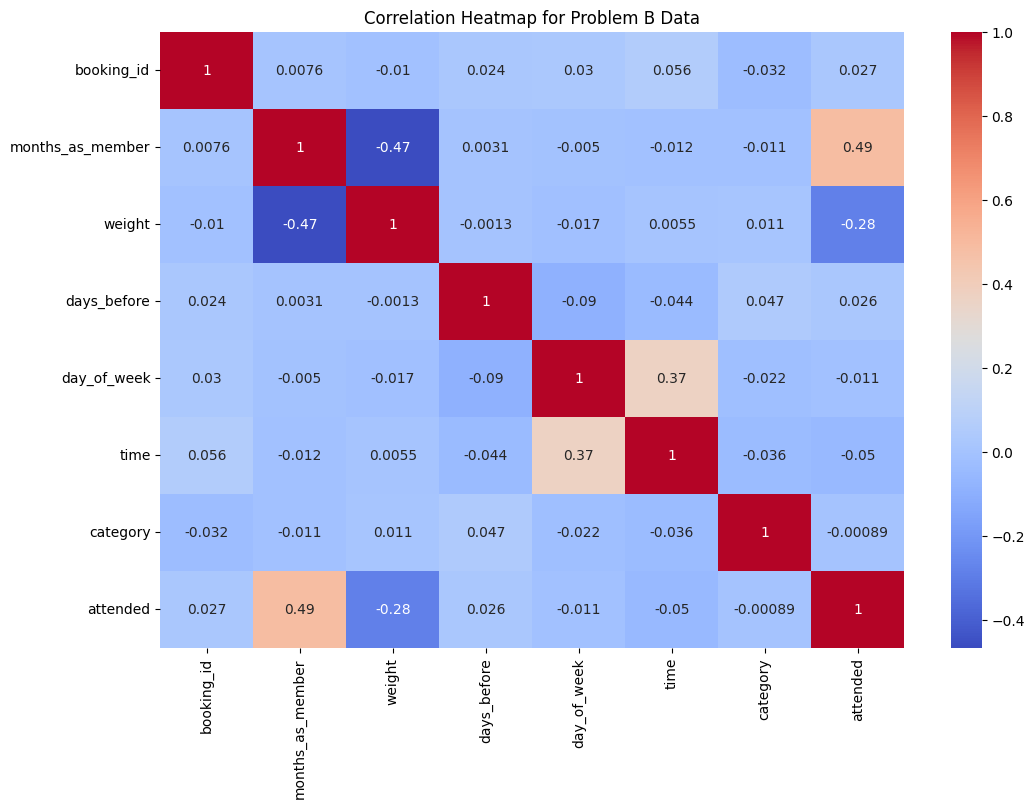

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(problem2_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Problem B Data')
plt.show()

# PAIRPLOT FOR PROBLEM B

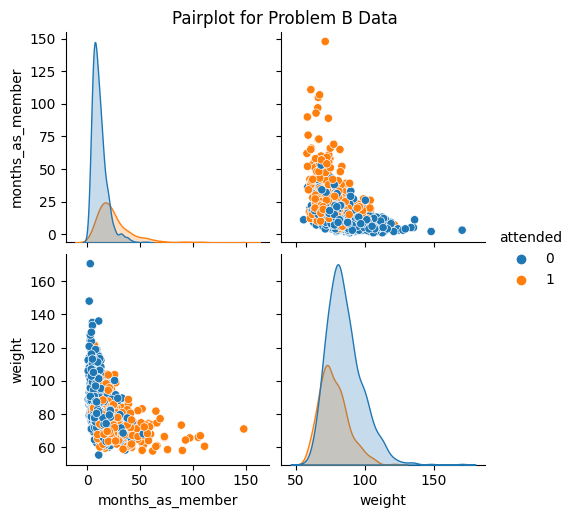

In [34]:
# Exclude non-numeric columns and columns not needed for pairplot
pairplot_columns = problem2_df.drop(columns=['booking_id', 'days_before', 'day_of_week', 'time', 'category'])

# Pairplot for Problem 2 Data
sns.pairplot(pairplot_columns, hue='attended')
plt.suptitle('Pairplot for Problem B Data', y=1.02)  # Adjust title position
plt.show()

# DISTRIBUTION OF PROBLEM A

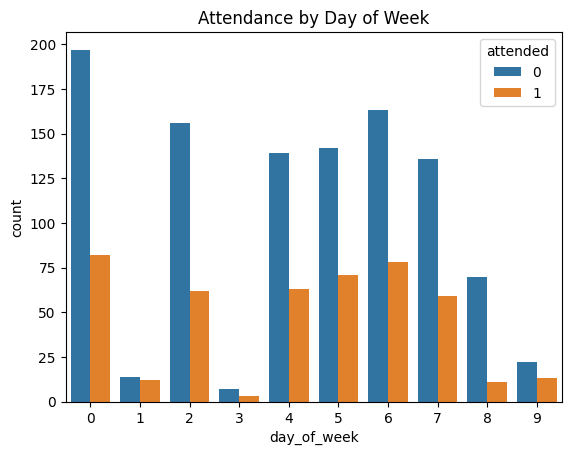

In [35]:
# Distribution of Attendance by Day of Week for Problem A
sns.countplot(x='day_of_week', hue='attended', data=problem2_df)
plt.title('Attendance by Day of Week')
plt.show()

# SPLITTING THE DATASET

In [36]:
# Problem A: Attendance Prediction
X1 = problem2_df.drop(columns=['attended', 'booking_id'])
y1 = problem2_df['attended']

# Problem B: Gym Crowdedness Prediction
X2 = problem1_df.drop(columns=['number_people', 'date'])
y2 = problem1_df['number_people']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

# HANDLING MISSING VALUES

In [37]:
# For Problem A: Attendance Prediction
imputer = SimpleImputer(strategy='median')
X_train1 = imputer.fit_transform(X_train1)
X_test1 = imputer.transform(X_test1)

# For Problem B: Gym Crowdedness Prediction
X_train2 = imputer.fit_transform(X_train2)
X_test2 = imputer.transform(X_test2)

# MODEL 1 FOR PROBLEM A (RANDOM FOREST CLASSIFIER)

In [38]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train1, y_train1)
y_pred1_rf = rf_classifier.predict(X_test1)

CONFUSION MATRIX


Confusion Matrix for Problem A (RandomForestClassifier):
[[260  33]
 [ 89  68]]

Classification Report for Problem A (RandomForestClassifier):
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       293
           1       0.67      0.43      0.53       157

    accuracy                           0.73       450
   macro avg       0.71      0.66      0.67       450
weighted avg       0.72      0.73      0.71       450



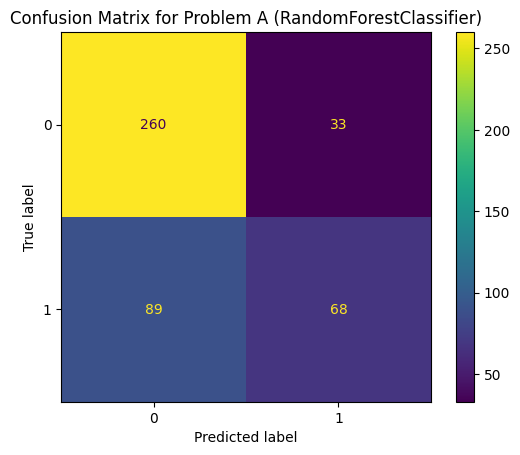

In [39]:
# Confusion Matrix and Classification Report 
print("\nConfusion Matrix for Problem A (RandomForestClassifier):")
print(confusion_matrix(y_test1, y_pred1_rf))
print("\nClassification Report for Problem A (RandomForestClassifier):")
print(classification_report(y_test1, y_pred1_rf))

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test1, y_test1)
plt.title("Confusion Matrix for Problem A (RandomForestClassifier)")
plt.show()

PRECISION-RECALL VALUE CURVE


ROC-AUC Score for Problem A (RandomForestClassifier): 0.7750157605269451


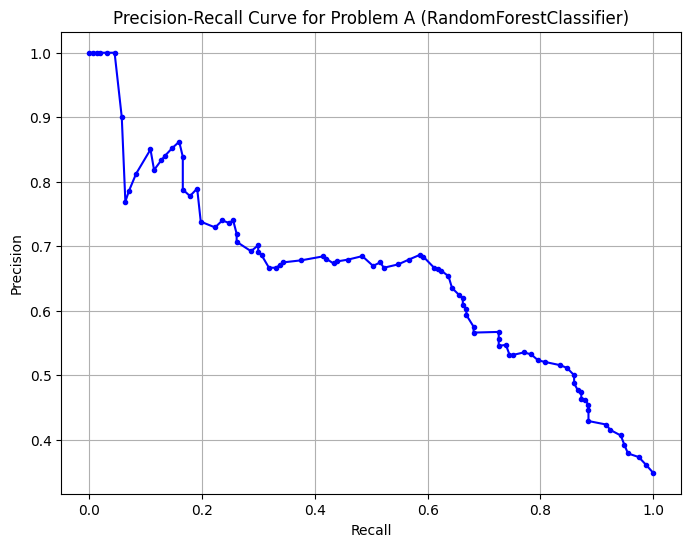

In [40]:
# ROC-AUC Score 
print("\nROC-AUC Score for Problem A (RandomForestClassifier):", roc_auc_score(y_test1, rf_classifier.predict_proba(X_test1)[:,1]))

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test1, rf_classifier.predict_proba(X_test1)[:,1])

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='blue')
plt.title('Precision-Recall Curve for Problem A (RandomForestClassifier)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

### INSIGHTS
Precision:
1. Class 0 (Did not attend): 0.74 (Out of all members predicted not to attend, 74% actually did not attend.)
2. Class 1 (Attended): 0.67 (Out of all members predicted to attend, 67% actually attended.)

Recall:
1. Class 0 (Did not attend): 0.89 (Out of all members who did not attend, 89% were correctly identified.)
2. Class 1 (Attended): 0.43 (Out of all members who attended, only 43% were correctly identified.)

F1-Score:
1. Class 0 (Did not attend): 0.81
2. Class 1 (Attended): 0.53

Accuracy: 0.73 (Overall, 73% of predictions were correct.)

# MODEL 2 FOR PROBLEM A (LOGISTIC REGRESSION)

In [41]:
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train1, y_train1)
y_pred1_lr = lr_classifier.predict(X_test1)

CONFUSION MATRIX


Confusion Matrix for Problem A (LogisticRegression):
[[277  16]
 [101  56]]

Classification Report for Problem A (LogisticRegression):
              precision    recall  f1-score   support

           0       0.73      0.95      0.83       293
           1       0.78      0.36      0.49       157

    accuracy                           0.74       450
   macro avg       0.76      0.65      0.66       450
weighted avg       0.75      0.74      0.71       450



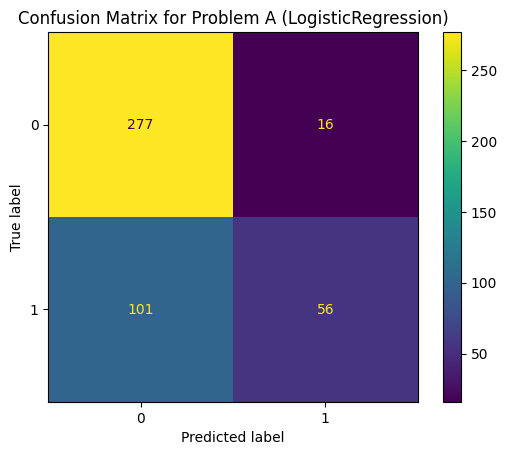

In [42]:
# Confusion Matrix and Classification Report 
print("\nConfusion Matrix for Problem A (LogisticRegression):")
print(confusion_matrix(y_test1, y_pred1_lr))
print("\nClassification Report for Problem A (LogisticRegression):")
print(classification_report(y_test1, y_pred1_lr))

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_estimator(lr_classifier, X_test1, y_test1)
plt.title("Confusion Matrix for Problem A (LogisticRegression)")
plt.show()

PRECISION-RECALL VALUE CURVE


ROC-AUC Score for Problem A (LogisticRegression): 0.8150040216517033


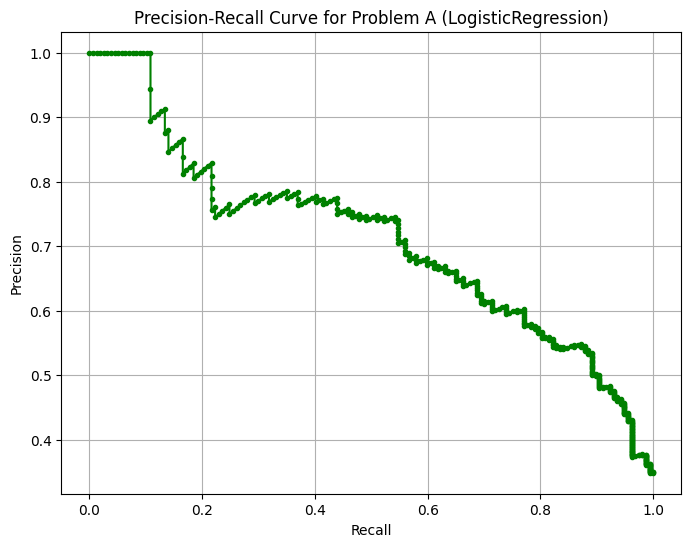

In [43]:
# ROC-AUC Score 
print("\nROC-AUC Score for Problem A (LogisticRegression):", roc_auc_score(y_test1, lr_classifier.predict_proba(X_test1)[:,1]))

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test1, lr_classifier.predict_proba(X_test1)[:,1])

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', color='green')
plt.title('Precision-Recall Curve for Problem A (LogisticRegression)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

### INSIGHTS:
Precision:
1. Class 0 (Did not attend): 0.73
2. Class 1 (Attended): 0.78

Recall:
1. Class 0 (Did not attend): 0.95
2. Class 1 (Attended): 0.36

F1-Score:
1. Class 0 (Did not attend): 0.83
2. Class 1 (Attended): 0.49

Accuracy: 0.74 (Overall, 74% of predictions were correct.)

# MODEL 1 FOR PROBLEM B (RANDOM FOREST REGRESSOR)

In [44]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train2, y_train2)
y_pred2_rf = rf_regressor.predict(X_test2)

# Mean Squared Error and R^2 Score 
print("\nMean Squared Error for Problem B (RandomForestRegressor): ", mean_squared_error(y_test2, y_pred2_rf))
print("R^2 Score for Problem B (RandomForestRegressor): ", r2_score(y_test2, y_pred2_rf))


Mean Squared Error for Problem B (RandomForestRegressor):  47.526129030891596
R^2 Score for Problem B (RandomForestRegressor):  0.9077946047521719


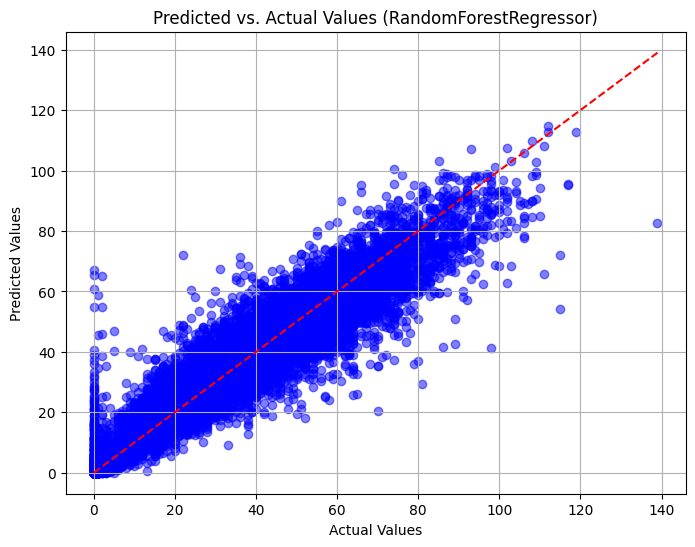

In [45]:
# Scatter plot of Predicted vs. Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test2, y_pred2_rf, color='blue', alpha=0.5)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'r--')  # Line of perfect prediction
plt.title('Predicted vs. Actual Values (RandomForestRegressor)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [46]:
lr_regressor = LinearRegression()
lr_regressor.fit(X_train2, y_train2)
y_pred2_lr = lr_regressor.predict(X_test2)

# Mean Squared Error and R^2 Score 
print("\nMean Squared Error for Problem B (LinearRegression): ", mean_squared_error(y_test2, y_pred2_lr))
print("R^2 Score for Problem B (LinearRegression): ", r2_score(y_test2, y_pred2_lr))


Mean Squared Error for Problem B (LinearRegression):  250.3668375432875
R^2 Score for Problem B (LinearRegression):  0.5142635496860599


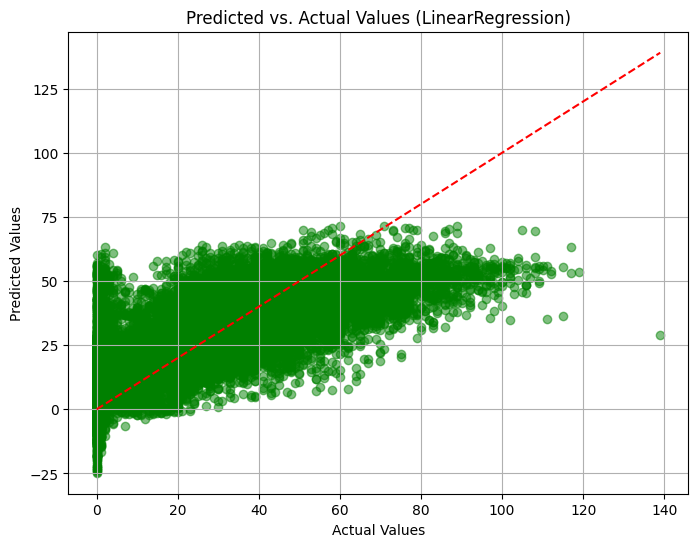

In [47]:
# Scatter plot of Predicted vs. Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test2, y_pred2_lr, color='green', alpha=0.5)
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], 'r--')  # Line of perfect prediction
plt.title('Predicted vs. Actual Values (LinearRegression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# SAVE THE MODELS

In [48]:
joblib.dump(rf_classifier, 'rf_classifier_model.pkl')
joblib.dump(lr_classifier, 'lr_classifier_model.pkl')
joblib.dump(rf_regressor, 'rf_regressor_model.pkl')
joblib.dump(lr_regressor, 'lr_regressor_model.pkl')

['lr_regressor_model.pkl']

# CONCLUSION

### FOR PROBLEM A:
RandomForestClassifier:
1. Accuracy: 73%
2. Precision (Attended): 67%
3. Recall (Attended): 43%
4. F1-Score (Attended): 0.53

LogisticRegression:
1. Accuracy: 74%
2. Precision (Attended): 78%
3. Recall (Attended): 36%
4. F1-Score (Attended): 0.49

Implementing the RandomForestClassifier model will allow GoodLife Fitness to more effectively manage class reservations, leading to increased availability for popular classes while reducing the likelihood of no-shows. This model supports the goal of maximizing class attendance and optimizing overall gym utilization, ultimately driving higher member satisfaction and profitability.

### FOR PROBLEM B:
RandomForestRegressor:
1. Mean Squared Error (MSE): 47.53
2. R² Score: 0.91

LinearRegression:
1. Mean Squared Error (MSE): 250.37
2. R² Score: 0.51

For Problem B, the RandomForestRegressor is clearly the better model compared to the LinearRegression model based on the provided metrics. It would be the recommended model to deploy for predicting gym crowdedness at GoodLife Fitness. The significant difference in MSE and R² scores highlights the importance of choosing the right model for the task, especially when dealing with complex data.